In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Parameters of the Axelrod model
grid_size = 32  # size of the grid
F = 3  # number of features
q = 7  # number of traits per feature

# Parameter for the noise
noise = 0.01  # probability of random cultural drift

# Parameter for the mass media influence
media = 0.01  # probability of adopting the global culture

In [3]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

In [4]:
def simulation_step():
    # Randomly select an agent
    x, y = np.random.randint(grid_size, size=2)

    # Randomly select a neighbor
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size  # periodic boundary conditions

    # If they share at least one cultural feature
    if any(culture_grid[x, y, :] == culture_grid[nx, ny, :]):
        # The agent adopts one differing feature from the neighbor
        differing_features = np.where(culture_grid[x, y, :] != culture_grid[nx, ny, :])[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture_grid[x, y, f] = culture_grid[nx, ny, f]

def simulation_step_with_noise():
    # Perform a normal simulation step
    simulation_step()

    # With a small probability, an agent randomly changes one of its features
    if np.random.rand() < noise:
        x, y = np.random.randint(grid_size, size=2)
        f = np.random.randint(F)
        culture_grid[x, y, f] = np.random.randint(q)

# The global culture
global_culture = np.random.randint(q, size=F)

def simulation_step_with_noise_and_media():
    # Perform a simulation step with noise
    simulation_step_with_noise()

    # With a small probability, an agent adopts the global culture
    if np.random.rand() < media:
        x, y = np.random.randint(grid_size, size=2)
        culture_grid[x, y, :] = global_culture

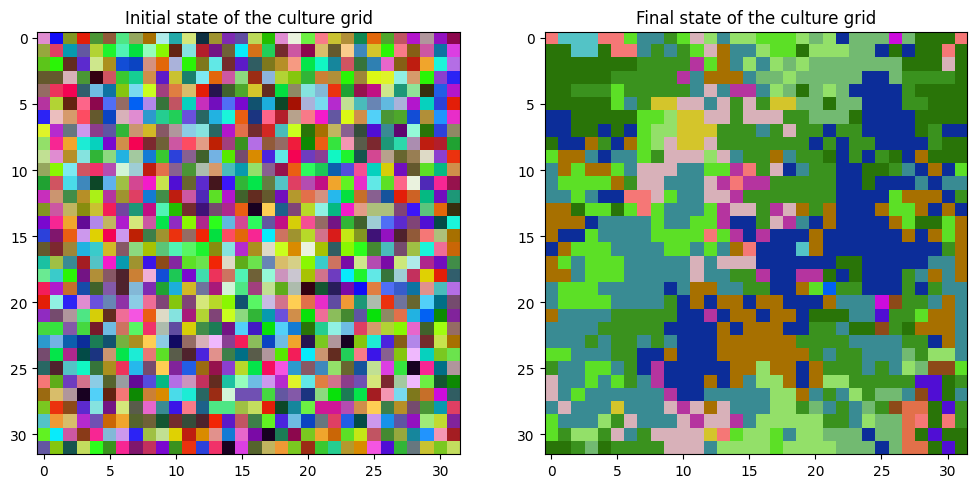

In [5]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid')

# Run the simulation for a certain number of steps
for _ in range(1000000):
    simulation_step()

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid')

plt.show()

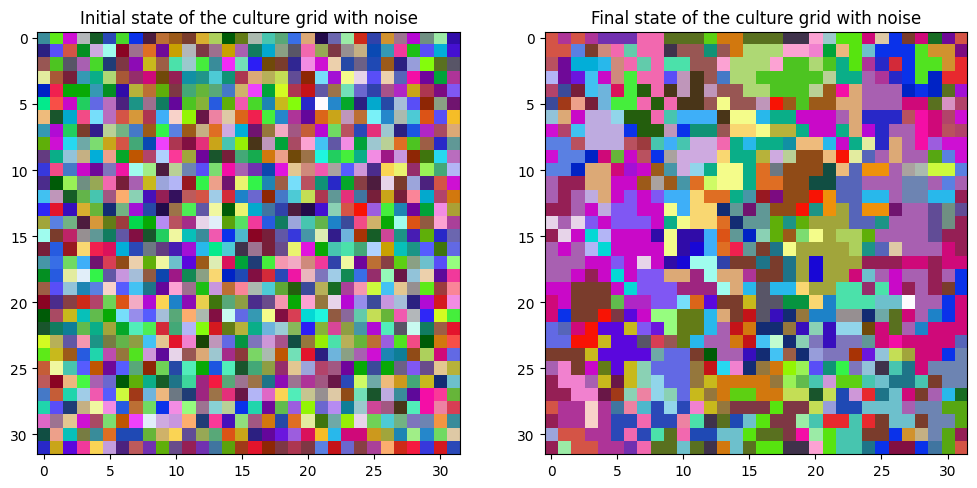

In [6]:
# Re-initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid with noise')

# Run the simulation for a certain number of steps
for _ in range(1000000):
    simulation_step_with_noise()

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid with noise')

plt.show()

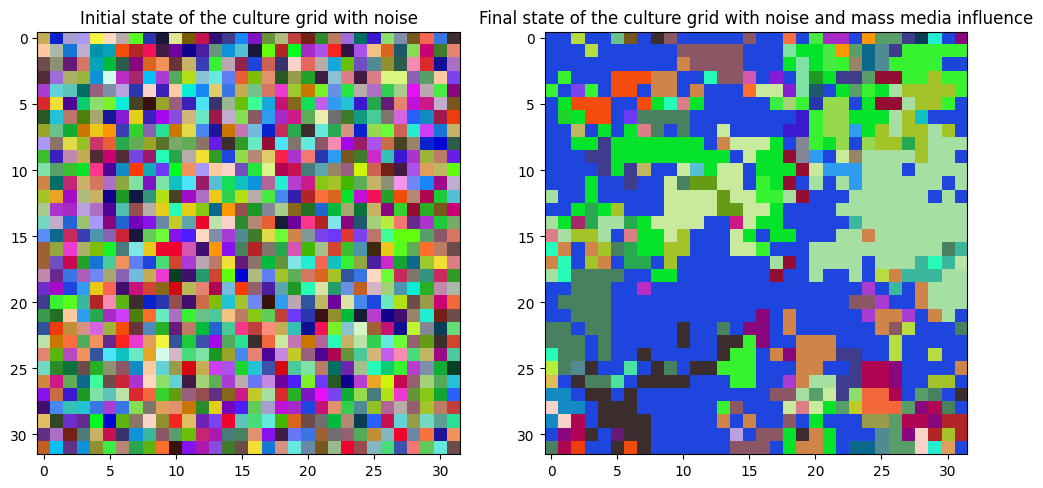

In [7]:
# Re-initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid with noise')

# Run the simulation with noise and mass media influence for a certain number of steps
for _ in range(1000000):
    simulation_step_with_noise_and_media()

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid with noise and mass media influence')

plt.show()